In [2]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math


moneda de 50 cent
50
moneda de 1€
150
moneda de 20 cent
170
moneda de 5 cent
175
moneda de 10 cent
185
moneda de 2 cent
187
moneda de 1 cent
188
Total en monedas: 188


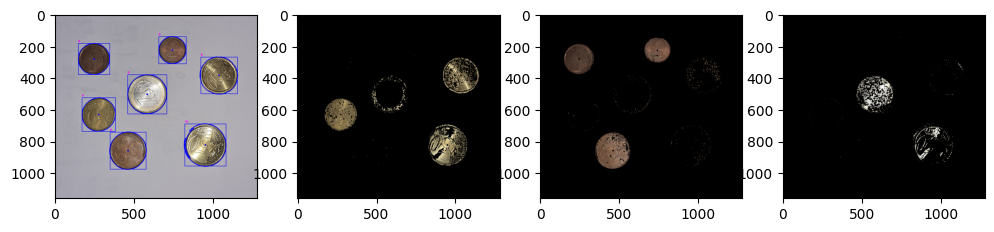

In [4]:
colorFinder = ColorFinder(False)
hsvValsGold = {'hmin':19, 'smin':45, 'vmin':53, 'hmax':179, 'smax':251, 'vmax': 255}
hsvValsBrown = {'hmin': 0, 'smin': 59, 'vmin': 0, 'hmax': 15, 'smax': 255, 'vmax': 255}
hsvValsSilver = {'hmin': 19, 'smin': 0, 'vmin': 70, 'hmax': 50, 'smax': 37, 'vmax': 255}

totalValue=0

def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 40, 180)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("monedas7.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=30)
# actualizamos
imgColorr, mask = colorFinder.update(imgContours, hsvValsGold)
imgColorr2, mask2 = colorFinder.update(imgContours, hsvValsBrown)
imgColorr3, mask3 = colorFinder.update(imgContours, hsvValsSilver)

if conFound:
    for contour in conFound:
        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]                      
            

            imgColor, mask = colorFinder.update(imgCrop, hsvValsGold)
            imgColor2, mask2 = colorFinder.update(imgCrop, hsvValsBrown)
            imgColor3, mask3 = colorFinder.update(imgCrop, hsvValsSilver)

            pixelsCountGold = cv2.countNonZero(mask)
            pixelsCountBrown = cv2.countNonZero(mask2)
            pixelsCountSilver = cv2.countNonZero(mask3)

            if pixelsCountBrown > 11000:
                if area > 33000:
                    # monedas de 5 cent
                    print('moneda de 5 cent')
                    totalValue +=5

                elif area < 25000:
                    # monedas de 1 cent
                    print('moneda de 1 cent')
                    totalValue +=1

                else:
                    # monedas de 2 cent
                    print('moneda de 2 cent')
                    totalValue +=2

            elif pixelsCountGold > 11000:
                if area > 45000:
                    # monedas de 5o cent
                    print('moneda de 50 cent')
                    totalValue +=50

                elif area > 40000:
                    # monedas de 20 cent
                    print('moneda de 20 cent')
                    totalValue +=20

                else:
                    # monedas de 10 cent
                    print('moneda de 10 cent')
                    totalValue +=10

            elif pixelsCountSilver > 11000:
                 # monedas de 2 cent
                print('moneda de 1€')
                totalValue +=100

            print(totalValue)
            cv2.imshow("nada", imgCrop)
            if cv2.waitKey(5000) == 27:
                continue



        # print(len(approx))

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
img_rgb2 = cv2.cvtColor(imgColorr, cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 2)
plt.imshow(img_rgb2) 
img_rgb3 = cv2.cvtColor(imgColorr2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 3)
plt.imshow(img_rgb3) 
img_rgb4 = cv2.cvtColor(imgColorr3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 4)
plt.imshow(img_rgb4) 
print('Total en monedas: ' + str(totalValue))

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
cv2.waitKey(0)
cv2.destroyAllWindows()


Clasificación de microplásticos

Total Pellet: 2
Total Alquitran: 7
Total Fragmentos: 60
Total Objetos Examinados: 69


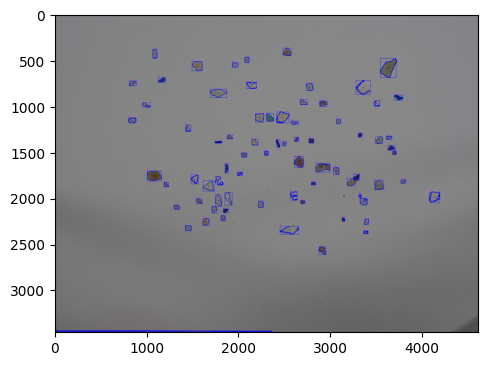

In [5]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
hsvValsBlack = {'hmin':47, 'smin':19, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 255}


totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("fragment-03-olympus-10-01-2020.JPG")
# img = cv2.imread("pellet-03-olympus-10-01-2020.JPG")
# img = cv2.imread("tar-03-olympus-10-01-2020.JPG")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)

numPel=0
numFra=0
numAlq=0

numIter =0
y_pred = []
if conFound:
    for contour in conFound:
        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            numIter += 1  
            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]
            imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)
            pixelsCountBlack = cv2.countNonZero(mask)
            perimetro = cv2.arcLength(contour['cnt'],True)

            imgCropGris = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
            circles = cv2.HoughCircles(imgCropGris, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)
            if circles is not None:
                circles = np.uint16(np.around(circles))
                for circle in circles[0, :]:
                    center = (circle[0], circle[1])
                    radius = circle[2]
                    cv2.circle(imgCrop, center, radius, (0, 255, 0), 2)
                numPel += 1
                y_pred.append(0)

            else:
                # No es un pellet
                # se calcula la relación area/pixeles negros
                # Si el valor es muy alto es que hay pocos pixeles negros y se puede descartar el alquitrán
                if(pixelsCountBlack !=0 and area/pixelsCountBlack  < 10):
                    numAlq += 1
                    y_pred.append(1)
                else:
                    numFra += 1
                    y_pred.append(2)

            # cv2.imshow("nada", imgCrop)            
            # if cv2.waitKey(5000) == 27:
            #     continue


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 

print('Total Pellet: ' + str(numPel))
print('Total Alquitran: ' + str(numAlq))
print('Total Fragmentos: ' + str(numFra))
print('Total Objetos Examinados: ' + str(numIter))

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
img = cv2.imread("fragment-03-olympus-10-01-2020.JPG")
    # img = cv2.imread("pellet-03-olympus-10-01-2020.JPG")
    # img = cv2.imread("tar-03-olympus-10-01-2020.JPG")

In [8]:
#función para matríz
def calculate_y_pred(image, y_predicha):
    img = cv2.imread(image)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgPre = preProcessing(img_gris)
    imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)

    numPel=0
    numFra=0
    numAlq=0

    numIter =0
    y_pred = y_predicha
    if conFound:
        for contour in conFound:
            peri = cv2.arcLength(contour['cnt'], True)
            approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
            if len(approx) >5:
                numIter += 1  
                area = contour['area']
                x, y, w, h = contour['bbox']
                imgCrop = img[y:y+h, x:x+w]
                imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)
                pixelsCountBlack = cv2.countNonZero(mask)
                perimetro = cv2.arcLength(contour['cnt'],True)

                imgCropGris = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
                circles = cv2.HoughCircles(imgCropGris, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)
                if circles is not None:
                    circles = np.uint16(np.around(circles))
                    for circle in circles[0, :]:
                        center = (circle[0], circle[1])
                        radius = circle[2]
                        cv2.circle(imgCrop, center, radius, (0, 255, 0), 2)
                    numPel += 1
                    y_pred.append(0)

                else:
                    # No es un pellet
                    # se calcula la relación area/pixeles negros
                    # Si el valor es muy alto es que hay pocos pixeles negros y se puede descartar el alquitrán
                    if(pixelsCountBlack !=0 and area/pixelsCountBlack  < 10):
                        numAlq += 1
                        y_pred.append(1)
                    else:
                        numFra += 1
                        y_pred.append(2)

                # cv2.imshow("nada", imgCrop)            
                # if cv2.waitKey(5000) == 27:
                #     continue

    return y_pred
    # plt.figure(figsize=(12, 6))
    # plt.subplot(1, 2, 1)
    # img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
    # plt.imshow(img_rgb) 

    # print('Total Pellet: ' + str(numPel))
    # print('Total Alquitran: ' + str(numAlq))
    # print('Total Fragmentos: ' + str(numFra))
    # print('Total Objetos Examinados: ' + str(numIter))

    # imS = cv2.resize(imgContours, (480, 640))                # Resize image
    # cv2.imshow("output", imS)  
    # imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
    # cv2.imshow("output2", imgColor)   
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


Matriz de confusión de todas las clases

In [10]:
#"fragment-03-olympus-10-01-2020.JPG"
#"pellet-03-olympus-10-01-2020.JPG"
#"tar-03-olympus-10-01-2020.JPG"
y_pred = calculate_y_pred("tar-03-olympus-10-01-2020.JPG", [])
y_pred = calculate_y_pred("pellet-03-olympus-10-01-2020.JPG", y_pred)
y_pred = calculate_y_pred("fragment-03-olympus-10-01-2020.JPG", y_pred)

print(str(len(y_pred)))


178


Accuracy (TP/(n))= 0.7921348314606742
Precision (TP/(TP+FP)) = 0.8133892409197806
Recall (TP/(TP+FN)) = 0.7921348314606742
F1 Score (2*(precision*recall)/(precision+recall)) = 0.782860558427602


Text(-11.749999999999998, 0.5, 'Anotada')

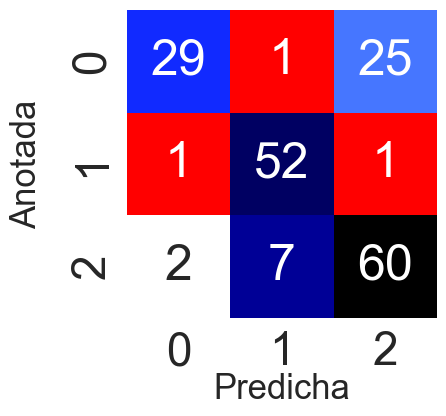

In [11]:

import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n1 = 54
n2 = 69
n0 = 55
nclases = 3

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
# y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador

y = [1 for _ in range(n1)] #alquitran
[y.append(0) for _ in range(n0)] #pellet
[y.append(2) for _ in range(n2)] #fragmentos


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)

Detectores de valores HSV de una imágen

In [ ]:
# Función callback para los trackbars
def on_change(value):
    global lower_bound, upper_bound
    lower_bound = np.array([cv2.getTrackbarPos("Hue Min", "ColorFinder"),
                            cv2.getTrackbarPos("Sat Min", "ColorFinder"),
                            cv2.getTrackbarPos("Val Min", "ColorFinder")])
    upper_bound = np.array([cv2.getTrackbarPos("Hue Max", "ColorFinder"),
                            cv2.getTrackbarPos("Sat Max", "ColorFinder"),
                            cv2.getTrackbarPos("Val Max", "ColorFinder")])

    # Filtrar la imagen con los valores actuales
    filtered_image = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Mostrar la imagen filtrada
    cv2.imshow("ColorFinder", filtered_image)

# Cargamos la imagen
image_path = "TAR.png"  # Reemplaza "tu_imagen.jpg" con la ruta de tu imagen
image = cv2.imread(image_path)

# Redimensionar la imagen a un tamaño más pequeño
resize_width = 585
resize_height = 471
image = cv2.resize(image, (resize_width, resize_height))

# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Crear una ventana con trackbars
cv2.namedWindow("ColorFinder")

# Redimensionar la ventana a un tamaño más pequeño
cv2.resizeWindow("ColorFinder", 585, 471)  

cv2.createTrackbar("Hue Min", "ColorFinder", 0, 179, on_change)
cv2.createTrackbar("Hue Max", "ColorFinder", 179, 179, on_change)
cv2.createTrackbar("Sat Min", "ColorFinder", 0, 255, on_change)
cv2.createTrackbar("Sat Max", "ColorFinder", 255, 255, on_change)
cv2.createTrackbar("Val Min", "ColorFinder", 0, 255, on_change)
cv2.createTrackbar("Val Max", "ColorFinder", 255, 255, on_change)

# Variables para los límites inferior y superior
lower_bound = np.array([0, 0, 0])
upper_bound = np.array([179, 255, 255])

# Inicializar con los valores por defecto
on_change(0)

# Mostrar la imagen original
cv2.imshow("ColorFinder", image)

# Esperar a que el usuario ajuste los valores con los trackbars
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2

# Función callback para los trackbars
def on_change(value):
    # Aplicar el detector de bordes Canny a la imagen
    edges = cv2.Canny(img_gris, cv2.getTrackbarPos("Umbral Mínimo", "Ajuste Canny"),
                      cv2.getTrackbarPos("Umbral Máximo", "Ajuste Canny"))

    # Mostrar la imagen con los bordes detectados
    cv2.imshow("Ajuste Canny", edges)

# Cargamos la imagen
image_path = "pel.png"  
image = cv2.imread(image_path)
img_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Redimensionar la imagen a un tamaño más pequeño
resize_width = 585
resize_height = 471
img_gris = cv2.resize(image, (resize_width, resize_height))

# Crear una ventana con trackbars
cv2.namedWindow("Ajuste Canny")
cv2.resizeWindow("Ajuste Canny", 585, 471)  

# Crear trackbars para el umbral mínimo y máximo
cv2.createTrackbar("Umbral Mínimo", "Ajuste Canny", 0, 255, on_change)
cv2.createTrackbar("Umbral Máximo", "Ajuste Canny", 0, 255, on_change)

# Llama a on_change con valores iniciales
on_change(0)

# Mostrar la imagen original
cv2.imshow("Ajuste Canny", image)

# Esperar a que el usuario ajuste los valores con los trackbars
cv2.waitKey(0)
cv2.destroyAllWindows()
